# Generating a CBN object

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
-------------------------------

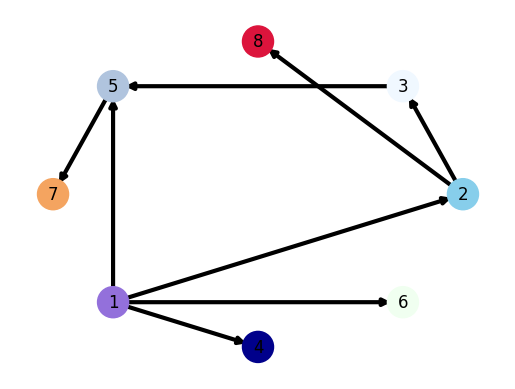

In [62]:
# external imports
import copy
import multiprocessing

# local imports
from classes.cbnetwork import CBN
from classes.globaltopology import GlobalTopology
from classes.localtemplates import LocalNetworkTemplate

# save the number of CPUs
NUM_CPUS = multiprocessing.cpu_count()

# pass the parameters
N_LOCAL_NETWORKS = 8
N_VARS_NETWORK = 20
N_OUTPUT_VARS = 2
N_INPUT_VARS = 2
V_TOPOLOGY = 2
N_MAX_CLAUSES = 2
N_MAX_LITERALS = 2

# GENERATE THE LOCAL NETWORK TEMPLATE
o_template = LocalNetworkTemplate(n_vars_network=N_VARS_NETWORK, n_input_variables=N_INPUT_VARS,
                                  n_output_variables=N_OUTPUT_VARS, n_max_of_clauses=N_MAX_CLAUSES,
                                  n_max_of_literals=N_MAX_LITERALS, v_topology=V_TOPOLOGY)

# GENERATE THE GLOBAL TOPOLOGY
o_global_topology = GlobalTopology.generate_sample_topology(v_topology=V_TOPOLOGY,
                                                            n_nodes=N_LOCAL_NETWORKS)

# generate aleatory CBN by topology
o_cbn = CBN.generate_cbn_from_template(v_topology=V_TOPOLOGY,
                                       n_local_networks=N_LOCAL_NETWORKS,
                                       n_vars_network=N_VARS_NETWORK,
                                       o_template=o_template,
                                       l_global_edges=o_global_topology.l_edges)

# Crear copias profundas del objeto original
o_cbn1 = copy.deepcopy(o_cbn) # Serial
o_cbn2 = copy.deepcopy(o_cbn) # Parallel Simple
o_cbn3 = copy.deepcopy(o_cbn) # Parallel with weights

# show the CBN Graph
o_cbn1.plot_topology()

# Find Local attractors

In [63]:
o_cbn1.find_local_attractors_sequential()

**************************************************
FIND LOCAL ATTRACTORS
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 1
--------------------------------------------------
Network: 1  Local Scene: None
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 2
--------------------------------------------------
Network: 2  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 2  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 3
--------------------------------------------------
Network: 3  Local Scene: 0
end find attractors
--------------------------------------------------
Network: 3  Local Scene: 1
end find attractors
--------------------------------------------------
FIND ATTRACTORS FOR NETWORK: 4
--------------------------------------------------
Network: 4  Local Scene: 0
end find attractors
--------

In [64]:
o_cbn2.find_local_attractors_parallel(num_cpus=NUM_CPUS)

**************************************************
FIND LOCAL ATTRACTORS PARALLEL
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------

----------------------------------------------------------------------------------------------------
FIND ATTRACTORS FOR NETWORK:

FIND ATTRACTORS FOR NETWORK: 
FIND ATTRACTORS FOR NETWORK: FIND ATTRACTORS FOR NETWORK: 
3FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:FIND ATTRACTORS FOR NETWORK:  51  
6
7 
8
--------------------------------------------------
4----------------------------------------------------------------------------------------------------2

--------------------------------------------------


Network:----------------------------------------------------

In [65]:
o_cbn3.find_local_attractors_parallel_with_weigths(num_cpus=NUM_CPUS)

**************************************************
FIND LOCAL ATTRACTORS WEIGHTED BALANCED

Número de workers: 12
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 1 tasks, total weight: 22
  Bucket 1: 1 tasks, total weight: 21
  Bucket 2: 1 tasks, total weight: 21
  Bucket 3: 1 tasks, total weight: 21
  Bucket 4: 1 tasks, total weight: 21
  Bucket 5: 1 tasks, total weight: 21
  Bucket 6: 1 tasks, total weight: 21
  Bucket 7: 1 tasks, total weight: 20
  Bucket 8: 0 tasks, total weight: 0
  Bucket 9: 0 tasks, total weight: 0
  Bucket 10: 0 tasks, total weight: 0
  Bucket 11: 0 tasks, total weight: 0
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------


--------------------------------------------------FIND ATTRACTORS FOR N

In [66]:
o_cbn1.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 4
Network: 1 - Scene: []
Attractors number: 4
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1']
['0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1']
['1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0']
['0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0']
['1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1']
['1', '1', 

In [67]:
o_cbn2.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 4
Network: 1 - Scene: []
Attractors number: 4
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1']
['0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1']
['1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0']
['0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0']
['1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1']
['1', '1', 

In [68]:
o_cbn3.show_local_attractors()

**************************************************
SHOW LOCAL ATTRACTORS
NETWORK 1
--------------------------------------------------
Network: 1 - Scene: [] - N. of Attractors: 4
Network: 1 - Scene: []
Attractors number: 4
--------------------------------------------------
Global index: 1 -> (1, 1, 1)
['1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1']
['0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0']
--------------------------------------------------
Global index: 2 -> (1, 1, 2)
['1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1']
['1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0']
['0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0']
['1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1']
['1', '1', 

In [69]:
len(o_cbn3.l_local_networks)

8

# Find compatible pairs

In [70]:
o_cbn1.find_compatible_pairs()

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
END FIND ATTRACTOR PAIRS


In [71]:
o_cbn2.find_compatible_pairs_parallel(num_cpus=NUM_CPUS)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL)
Tareas creadas: 8
Resultados obtenidos: 8
--------------------------------------------------
END FIND COMPATIBLE ATTRACTOR PAIRS (Total pairs: 86)


In [72]:
o_cbn3.find_compatible_pairs_parallel_with_weights(num_cpus=NUM_CPUS)

**************************************************
FIND COMPATIBLE ATTRACTOR PAIRS (PARALLEL WITH WEIGHTS)

Número de CPUs: 12
Distribución de tareas por bucket antes de la ejecución:
  Bucket 0: 1 tasks, total weight: 14
  Bucket 1: 1 tasks, total weight: 6
  Bucket 2: 1 tasks, total weight: 6
  Bucket 3: 1 tasks, total weight: 6
  Bucket 4: 1 tasks, total weight: 4
  Bucket 5: 1 tasks, total weight: 4
  Bucket 6: 1 tasks, total weight: 4
  Bucket 7: 1 tasks, total weight: 4
  Bucket 8: 0 tasks, total weight: 0
  Bucket 9: 0 tasks, total weight: 0
  Bucket 10: 0 tasks, total weight: 0
  Bucket 11: 0 tasks, total weight: 0

Número de tareas procesadas: 8
Total de pares de atractores: 172

Información final de los buckets:
  Bucket 0: 1 tasks, total weight: 14
  Bucket 1: 1 tasks, total weight: 6
  Bucket 2: 1 tasks, total weight: 6
  Bucket 3: 1 tasks, total weight: 6
  Bucket 4: 1 tasks, total weight: 4
  Bucket 5: 1 tasks, total weight: 4
  Bucket 6: 1 tasks, total weight: 4
  Bucket

In [73]:
o_cbn1.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 161, Scene: 0
(8, 10)
(8, 10)
--------------------------------------------------
Coupling Variable: 161, Scene: 1
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(9, 11)
(9, 12)
(9, 13)
(9, 14)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(9, 11)
(9, 12)
(9, 13)
(9, 14)
--------------------------------------------------
Edge: 2 -> 8
--------------------------------------------------
Coupling Variable: 162, Scene: 0
(8, 43)
(8, 43)
--------------------------------------------------
Coupling Variable: 162, Scene: 1
(5, 44)
(5, 45)
(5, 46)
(5, 47)
(9, 44)
(9, 45)
(9, 46)
(9, 47)
(5, 44)
(5, 45)
(5, 46)
(5, 47)
(9, 44)
(9, 45)
(9, 46)
(9, 47)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 163, Scene: 0
(13, 20)
(13, 21)
(13, 22)
(13, 23)
(13, 24)
(13, 20)
(13, 21

In [74]:
o_cbn2.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 161, Scene: 0
(8, 10)
--------------------------------------------------
Coupling Variable: 161, Scene: 1
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(9, 11)
(9, 12)
(9, 13)
(9, 14)
--------------------------------------------------
Edge: 2 -> 8
--------------------------------------------------
Coupling Variable: 162, Scene: 0
(8, 43)
--------------------------------------------------
Coupling Variable: 162, Scene: 1
(5, 44)
(5, 45)
(5, 46)
(5, 47)
(9, 44)
(9, 45)
(9, 46)
(9, 47)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 163, Scene: 0
(13, 20)
(13, 21)
(13, 22)
(13, 23)
(13, 24)
--------------------------------------------------
Coupling Variable: 163, Scene: 1
(10, 25)
(10, 26)
(10, 27)
(10, 28)
(10, 29)
(10, 30)
(10, 31)
(10, 32)
(14,

In [75]:
o_cbn3.show_attractor_pairs()

LIST OF THE COMPATIBLE ATTRACTOR PAIRS
--------------------------------------------------
Edge: 2 -> 3
--------------------------------------------------
Coupling Variable: 161, Scene: 0
(8, 10)
(8, 10)
--------------------------------------------------
Coupling Variable: 161, Scene: 1
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(9, 11)
(9, 12)
(9, 13)
(9, 14)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(9, 11)
(9, 12)
(9, 13)
(9, 14)
--------------------------------------------------
Edge: 2 -> 8
--------------------------------------------------
Coupling Variable: 162, Scene: 0
(8, 43)
(8, 43)
--------------------------------------------------
Coupling Variable: 162, Scene: 1
(5, 44)
(5, 45)
(5, 46)
(5, 47)
(9, 44)
(9, 45)
(9, 46)
(9, 47)
(5, 44)
(5, 45)
(5, 46)
(5, 47)
(9, 44)
(9, 45)
(9, 46)
(9, 47)
--------------------------------------------------
Edge: 3 -> 5
--------------------------------------------------
Coupling Variable: 163, Scene: 0
(13, 20)
(13, 21)
(13, 22)
(13, 23)
(13, 24)
(13, 20)
(13, 21

# Mount stable attractor fields

In [79]:
o_cbn1.mount_stable_attractor_fields()

**************************************************
FIND ATTRACTOR FIELDS
--------------------------------------------------
END MOUNT ATTRACTOR FIELDS


In [80]:
o_cbn2.mount_stable_attractor_fields_parallel(num_cpus=NUM_CPUS)

**************************************************
MOUNT STABLE ATTRACTOR FIELDS (PARALLEL)

Procesando arista 2 con 9 pares base
Base actualizada: 33 pares

Procesando arista 3 con 33 pares base
Base actualizada: 112 pares

Procesando arista 4 con 112 pares base
Base actualizada: 162 pares

Procesando arista 5 con 162 pares base
Base actualizada: 162 pares

Procesando arista 6 con 162 pares base
Base actualizada: 420 pares

Procesando arista 7 con 420 pares base
Base actualizada: 216 pares

Procesando arista 8 con 216 pares base
Base actualizada: 756 pares
--------------------------------------------------
END MOUNT STABLE ATTRACTOR FIELDS (PARALLEL)


In [78]:
o_cbn3.mount_stable_attractor_fields_parallel_chunks()

**************************************************
MOUNT STABLE ATTRACTOR FIELDS (PARALLEL CHUNKS)

Procesando arista 2 con 9 pares base; chunk size: 1
  Chunk 0: 1 pares
  Chunk 1: 1 pares
  Chunk 2: 1 pares
  Chunk 3: 1 pares
  Chunk 4: 1 pares
  Chunk 5: 1 pares
  Chunk 6: 1 pares
  Chunk 7: 1 pares
  Chunk 8: 1 pares
Base actualizada: 33 pares

Procesando arista 3 con 33 pares base; chunk size: 3
  Chunk 0: 3 pares
  Chunk 1: 3 pares
  Chunk 2: 3 pares
  Chunk 3: 3 pares
  Chunk 4: 3 pares
  Chunk 5: 3 pares
  Chunk 6: 3 pares
  Chunk 7: 3 pares
  Chunk 8: 3 pares
  Chunk 9: 3 pares
  Chunk 10: 3 pares
Base actualizada: 112 pares

Procesando arista 4 con 112 pares base; chunk size: 10
  Chunk 0: 10 pares
  Chunk 1: 10 pares
  Chunk 2: 10 pares
  Chunk 3: 10 pares
  Chunk 4: 10 pares
  Chunk 5: 10 pares
  Chunk 6: 10 pares
  Chunk 7: 10 pares
  Chunk 8: 10 pares
  Chunk 9: 10 pares
  Chunk 10: 10 pares
  Chunk 11: 2 pares
Base actualizada: 162 pares

Procesando arista 5 con 162 pare

TypeError: 'int' object is not iterable